In [29]:
import tensorflow as tf
import numpy as np


DATASET

The dataset used is an EuroSat dataset from Kaggle: https://www.kaggle.com/datasets/apollo2506/eurosat-dataset

The classes used in this experiment are:
AnnualCrop, Forest, HerbaceousVegetation, Highway, Industrial, Pasture, PermanentCrop, Residential,

Sealake and river are excluded as they are not related with deforestaion

In [30]:
DATA_DIR= r"D:\University\sem5\Deep Learning\dataset"

In [31]:
def train_val_dataset():
    
    training_dataset=tf.keras.utils.image_dataset_from_directory(
        directory=DATA_DIR,
        image_size=(150,150),
        batch_size=32,
        label_mode= "categorical",
        validation_split=0.1,
        subset="training",
        seed=42
    )
    
    
    validation_set= tf.keras.utils.image_dataset_from_directory(
        directory= DATA_DIR,
        image_size=(150,150),
        batch_size=32,
        label_mode="categorical",
        validation_split=0.1,
        subset="validation",
        seed=42
    )
    
    return training_dataset, validation_set

In [32]:
training_dataset, validation_dataset= train_val_dataset()

Found 21500 files belonging to 8 classes.
Using 19350 files for training.
Found 21500 files belonging to 8 classes.
Using 2150 files for validation.


In [33]:
for images, labels in training_dataset.take(1):
    print("Labels shape:", labels.shape)
    print("Sample labels:", labels[0])


Labels shape: (32, 8)
Sample labels: tf.Tensor([0. 0. 1. 0. 0. 0. 0. 0.], shape=(8,), dtype=float32)


In [34]:
for images, labels in training_dataset:
    example_batch_images=images
    example_batch_labels=labels
    
    
print(f"Maximum pixel value of images: {np.max(example_batch_images)}\n")
print(f"Shape of batch of images: {example_batch_images.shape}")
print(f"Shape of batch of labels: {example_batch_labels.shape}")

print(f"Maximum pixel value of images : {np.max(example_batch_images)}\n")
print (f"Shape of batch of images: {example_batch_images.shape}")
print(f"SHape of batch of labels : {example_batch_labels.shape} ")

Maximum pixel value of images: 255.0

Shape of batch of images: (22, 150, 150, 3)
Shape of batch of labels: (22, 8)
Maximum pixel value of images : 255.0

Shape of batch of images: (22, 150, 150, 3)
SHape of batch of labels : (22, 8) 


In [35]:
classnames= training_dataset.class_names
classnames

['AnnualCrop',
 'Forest',
 'HerbaceousVegetation',
 'Highway',
 'Industrial',
 'Pasture',
 'PermanentCrop',
 'Residential']

In [44]:
augmentation=tf.keras.Sequential([
    tf.keras.Input(shape=(150,150,3)),
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.2, fill_mode="reflect"),
    tf.keras.layers.RandomTranslation(0.1, 0.1, fill_mode="reflect"),
    tf.keras.layers.RandomZoom(0.2, fill_mode="reflect")
])


In [45]:
def create_model():
    model= tf.keras.models.Sequential([
        tf.keras.layers.Input((150,150,3)),
        augmentation,
        tf.keras.layers.Rescaling((1./255)),
        tf.keras.layers.Conv2D(64,(3,3), activation="relu"),
        tf.keras.layers.MaxPooling2D((2,2)),
        tf.keras.layers.Conv2D(64,(3,3), activation="relu"),
        tf.keras.layers.MaxPooling2D((2,2)),
        tf.keras.layers.Conv2D(64,(3,3), activation="relu"),
        tf.keras.layers.MaxPooling2D((2,2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation="relu"),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(8, activation="softmax")
    ])
    
    model.compile(
        optimizer=tf.keras.optimizers.Adam(),
        loss=tf.keras.losses.CategoricalCrossentropy(),
        metrics=["accuracy"]
    )
    
    return model

In [46]:
model= create_model()

In [47]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_8 (Sequential)   (None, 150, 150, 3)       0         
                                                                 
 rescaling_3 (Rescaling)     (None, 150, 150, 3)       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 74, 74, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 36, 36, 64)        0         
 ng2D)                                                

In [ ]:
""""
class EarlyStoppingCallback(tf.keras.callbacks.Callback):
    
    def on_epoch_end(self, epoch, logs=None):
        if logs["accuracy"]>=0.94 and logs["val_accuracy"]>=0.82:
            self.model.stop_training=True
"""

In [48]:
with tf.device('/GPU:0'):
    history= model.fit(
        training_dataset,
        epochs=10,
        validation_data= validation_dataset,
        #callbacks= [EarlyStoppingCallback()]
    )

Epoch 1/10
605/605 [==============================] - 217s 356ms/step - loss: 1.4060 - accuracy: 0.4625 - val_loss: 0.9875 - val_accuracy: 0.6544
Epoch 2/10
605/605 [==============================] - 213s 352ms/step - loss: 1.0089 - accuracy: 0.6357 - val_loss: 0.8041 - val_accuracy: 0.6986
Epoch 3/10
605/605 [==============================] - 214s 353ms/step - loss: 0.8589 - accuracy: 0.6909 - val_loss: 0.6434 - val_accuracy: 0.7567
Epoch 4/10
605/605 [==============================] - 214s 353ms/step - loss: 0.7707 - accuracy: 0.7222 - val_loss: 0.6603 - val_accuracy: 0.7493
Epoch 5/10
605/605 [==============================] - 215s 356ms/step - loss: 0.7297 - accuracy: 0.7418 - val_loss: 0.5738 - val_accuracy: 0.7912
Epoch 6/10
605/605 [==============================] - 215s 355ms/step - loss: 0.6713 - accuracy: 0.7634 - val_loss: 0.6048 - val_accuracy: 0.7647
Epoch 7/10
605/605 [==============================] - 214s 353ms/step - loss: 0.6378 - accuracy: 0.7782 - val_loss: 0.5146 -

In [49]:
model.evaluate(validation_dataset)

68/68 [==============================] - 6s 87ms/step - loss: 0.4911 - accuracy: 0.8316


[0.49107229709625244, 0.8316279053688049]

In [20]:
import tensorflow as tf
import numpy as np

def predictimage(Impath):
    
    img= tf.keras.preprocessing.image.load_img(Impath, target_size=(150,150))
    img_array= tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)

    
    predictions=model.predict(img_array)
    predicted_class=np.argmax(predictions)
   
    
    return f"the predicted picture is {classnames[predicted_class]}"

In [21]:
predictimage(r"D:\University\Semester 4\Pattern Recognition FInal Project\test image\sunny3.jpg")

1/1 [==============================] - 0s 205ms/step


'the predicted picture is Shine'

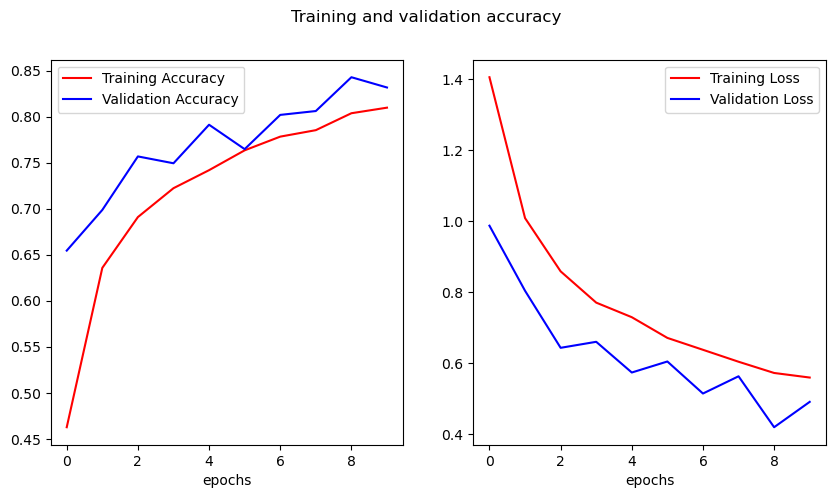

In [51]:
import matplotlib.pyplot as plt
# Get training and validation accuracies
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Training and validation accuracy')

for i, (data, label) in enumerate(zip([(acc, val_acc), (loss, val_loss)], ["Accuracy", "Loss"])):
    ax[i].plot(epochs, data[0], 'r', label="Training " + label)
    ax[i].plot(epochs, data[1], 'b', label="Validation " + label)
    ax[i].legend()
    ax[i].set_xlabel('epochs')

plt.show()

Resnet 50

In [52]:
pretrained_model= tf.keras.applications.ResNet50(
    include_top=False,
    input_shape=(150,150,3),
    pooling= "max",
    classes=8,
    weights="imagenet"
)

In [53]:
from tensorflow.keras.applications import ResNet50


In [54]:
pretrained_model.trainable = False

In [55]:
def create_model2():
    model_resnet= tf.keras.models.Sequential([
        pretrained_model,
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation="relu"),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(8, activation="softmax")
    ])
    
    model_resnet.compile(
        optimizer=tf.keras.optimizers.Adam(),
        loss=tf.keras.losses.CategoricalCrossentropy(),
        metrics=["accuracy"]
    )
    
    return model_resnet

In [56]:
model_resnet= create_model2()

In [57]:
model_resnet.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten_8 (Flatten)         (None, 2048)              0         
                                                                 
 dense_16 (Dense)            (None, 512)               1049088   
                                                                 
 dropout_8 (Dropout)         (None, 512)               0         
                                                                 
 dense_17 (Dense)            (None, 8)                 4104      
                                                                 
Total params: 24640904 (94.00 MB)
Trainable params: 1053192 (4.02 MB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [58]:
with tf.device('/GPU:0'):
    history2= model_resnet.fit(
        training_dataset,
        epochs=10,
        validation_data= validation_dataset,
        #callbacks= [EarlyStoppingCallback()]
    )

Epoch 1/10
605/605 [==============================] - 391s 641ms/step - loss: 0.5464 - accuracy: 0.8668 - val_loss: 0.1892 - val_accuracy: 0.9414
Epoch 2/10
605/605 [==============================] - 380s 627ms/step - loss: 0.2642 - accuracy: 0.9162 - val_loss: 0.1610 - val_accuracy: 0.9493
Epoch 3/10
605/605 [==============================] - 378s 625ms/step - loss: 0.2137 - accuracy: 0.9301 - val_loss: 0.1481 - val_accuracy: 0.9516
Epoch 4/10
605/605 [==============================] - 378s 625ms/step - loss: 0.1985 - accuracy: 0.9358 - val_loss: 0.1544 - val_accuracy: 0.9502
Epoch 5/10
605/605 [==============================] - 362s 599ms/step - loss: 0.1775 - accuracy: 0.9427 - val_loss: 0.1782 - val_accuracy: 0.9558
Epoch 6/10
605/605 [==============================] - 379s 626ms/step - loss: 0.1719 - accuracy: 0.9460 - val_loss: 0.1499 - val_accuracy: 0.9558
Epoch 7/10
605/605 [==============================] - 347s 574ms/step - loss: 0.1619 - accuracy: 0.9472 - val_loss: 0.1660 -

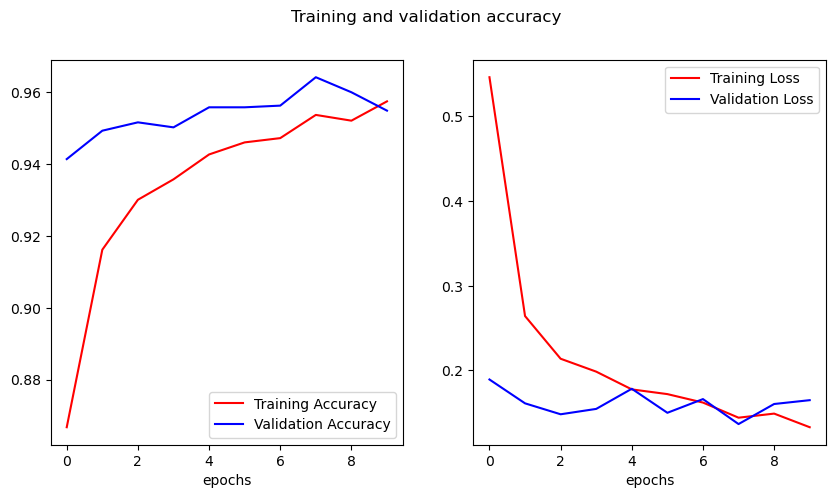

In [60]:
import matplotlib.pyplot as plt
# Get training and validation accuracies
acc2 = history2.history['accuracy']
val_acc2 = history2.history['val_accuracy']
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Training and validation accuracy')

for i, (data, label) in enumerate(zip([(acc2, val_acc2), (loss2, val_loss2)], ["Accuracy", "Loss"])):
    ax[i].plot(epochs, data[0], 'r', label="Training " + label)
    ax[i].plot(epochs, data[1], 'b', label="Validation " + label)
    ax[i].legend()
    ax[i].set_xlabel('epochs')

plt.show()

In [63]:
model.save(r"D:\University\sem5\Deep Learning")

INFO:tensorflow:Assets written to: D:\University\sem5\Deep Learning\assets


INFO:tensorflow:Assets written to: D:\University\sem5\Deep Learning\assets


In [67]:
model.save("model1.h5")  # saves entire model in HDF5


In [69]:
model_resnet.save("model_resnet.h5")

C:\Users\asus\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [70]:
import json

# Save history as JSON
with open("history.json", "w") as f:
    json.dump(history.history, f)


In [71]:
import json

# Save history as JSON
with open("history2.json", "w") as f:
    json.dump(history2.history, f)
